# Olympic data | Exploration

## Packages

For simplicity, we use `kaggle` for now. Since the dataset is on the website, this makes it easy to download it and load it with `pandas`

In [1]:
%%capture
#to avoid output

!pip install -r ../requirements.txt

%load_ext autoreload
%autoreload 2

## Loading :3

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "heesoo37/120-years-of-olympic-history-athletes-and-results", 'athlete_events.csv')

## Data info & cleaning 

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


This gives 270k athletes informations, and most of them are not NaNs, which is great. Some of the age, height and weight are missing. Some medals as well, but this is probably only because most athletes did not receive a medal.

In [6]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [17]:
golds_CH_FRA = df[(df['Medal'] == 'Gold') & (df['Team'].isin(['Switzerland', 'France']))]
golds_CH_FRA = golds_CH_FRA.groupby(['Year', 'Team']).size().reset_index().rename(columns={0:'Count'})

In [18]:
import plotly.express as px


px.bar(gold_CH_FRA, x='Year', y='Count', color='Team', title='Gold Medals by Year for Switzerland and France', barmode='group')

In [38]:

mean_age_medal = df[~df.Medal.isna()].groupby(['Year', 'Medal'])['Age'].mean().reset_index()
fig = px.line(mean_age_medal, x='Year', y='Age', color='Medal', title='Mean age of Gold medalist')
fig.update_layout(hovermode="x unified")

In [43]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [51]:
import pandas as pd
import plotly.graph_objects as go

medals_df = df.dropna(subset=['Medal'])

medal_counts = medals_df.groupby(['Year', 'Team']).size().reset_index(name='Count')

years = sorted(medal_counts['Year'].unique())

frames = []
for year in years:
    year_data = medal_counts[medal_counts['Year'] == year]
    
    frame = go.Frame(
        data=[go.Choropleth(
            locations=year_data['Team'],
            z=year_data['Count'],
            locationmode='country names', 
            colorscale='Viridis',
            colorbar_title='Medals',
            hovertemplate='<b>%{location}</b><br>Medals: %{z}<extra></extra>'
        )],
        name=str(year)
    )
    frames.append(frame)

first_year = years[0]
first_year_data = medal_counts[medal_counts['Year'] == first_year]

fig = go.Figure(
    data=[go.Choropleth(
        locations=first_year_data['Team'],
        z=first_year_data['Count'],
        locationmode='country names',
        colorscale='Viridis',
        colorbar_title='Medals',
        hovertemplate='<b>%{location}</b><br>Medals: %{z}<extra></extra>'
    )],
    frames=frames
)

# Add slider and play button
fig.update_layout(
    width=1000,
    height=800,
    title='Olympic Medals by Country Over Time',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=500, redraw=True))]
        ), dict(
            label='Pause',
            method='animate',
            args=[[None], dict(frame=dict(duration=0, redraw=True))]
        )]
    )],
    sliders=[dict(
        active=0,
        steps=[dict(
            method='animate',
            args=[[str(year)], dict(frame=dict(duration=300, redraw=True))],
            label=str(year)
        ) for year in years]
    )]
)

In [60]:
basket = df[df['Event'] == 'Basketball Men\'s Basketball'][['Height', 'Medal']]
basket['Medal'] = ~basket['Medal'].isna()
basket = basket.dropna(subset=['Height'])

In [63]:
df.Event.unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [62]:
correlation = basket.corr()
print(correlation)

          Height     Medal
Height  1.000000  0.146254
Medal   0.146254  1.000000


,Weight,Medal


In [70]:
wrestling = df[df['Event'] == 'Wrestling Men\'s Lightweight, Greco-Roman'][['Weight', 'Medal']]
wrestling['Medal'] = ~wrestling['Medal'].isna()
wrestling = wrestling.dropna(subset=['Weight'])
wrestling.corr()

,Weight,Medal
Weight,1.000000,0.039583
Medal,0.039583,1.000000


Top 10 Events with Most Significant Differences:
                                               Event Strongest_factor  \
0           Canoeing Men's Kayak Fours, 1,000 metres           Weight   
1                        Basketball Men's Basketball           Weight   
2                      Ice Hockey Women's Ice Hockey           Weight   
3                        Water Polo Men's Water Polo           Weight   
4               Athletics Men's 4 x 400 metres Relay           Weight   
5    Swimming Women's 4 x 100 metres Freestyle Relay           Weight   
6                        Volleyball Men's Volleyball              Age   
7       Cycling Men's 100 kilometres Team Time Trial           Weight   
8  Cross Country Skiing Men's 4 x 10 kilometres R...              Age   
9                   Gymnastics Men's Team All-Around           Weight   

        P_value  
0  2.278512e-14  
1  2.345346e-14  
2  5.702212e-13  
3  2.530720e-12  
4  4.024965e-12  
5  1.546177e-11  
6  3.954500e-10  
7  

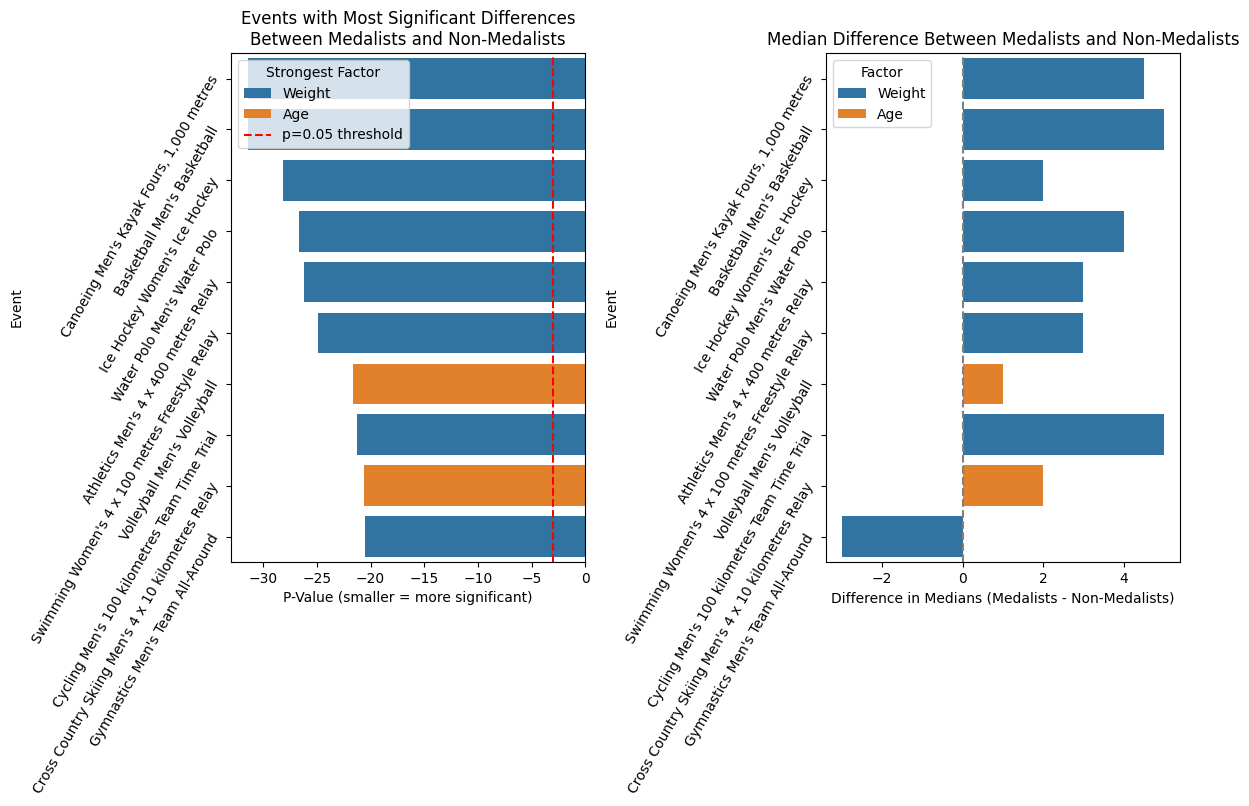

Plotting distributions for event with most significant difference: Canoeing Men's Kayak Fours, 1,000 metres


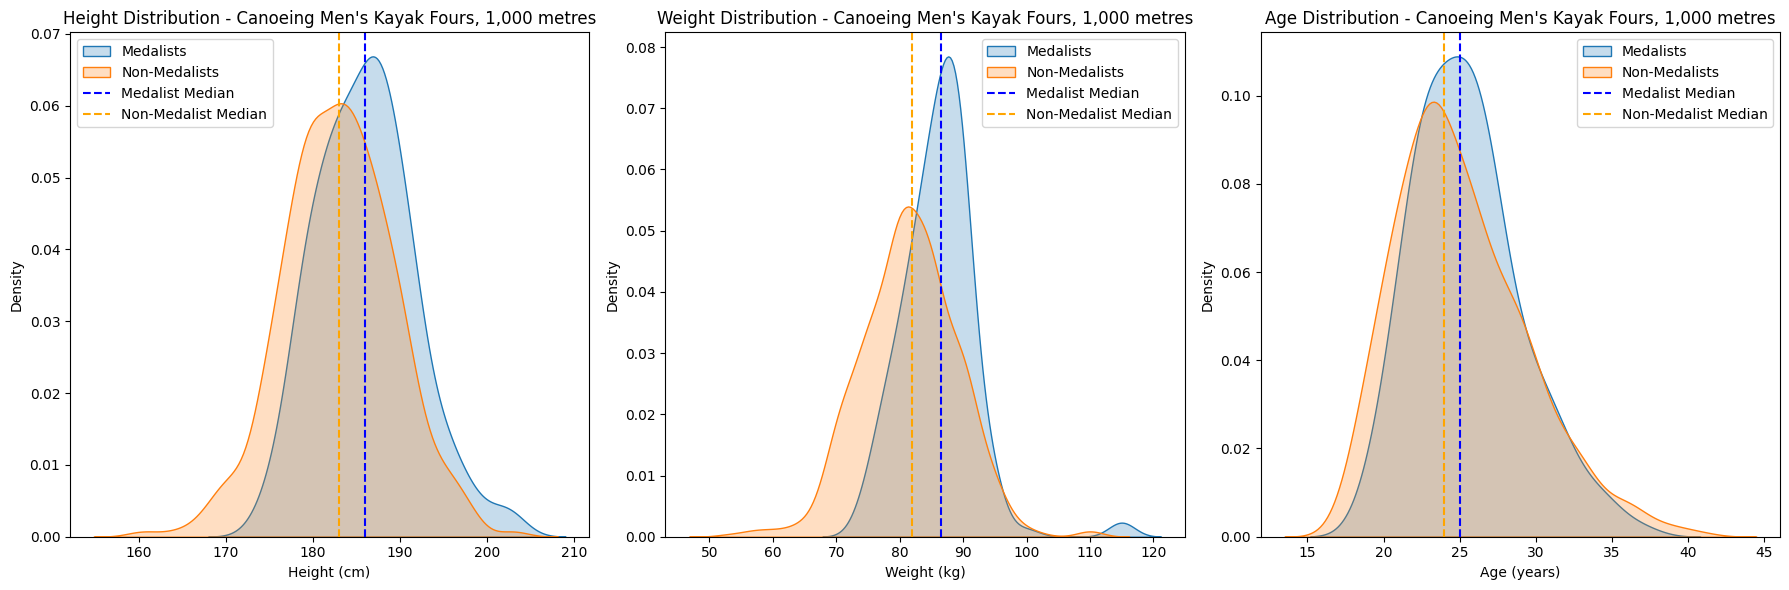

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create medal indicator
df['Medal_numeric'] = df['Medal'].notna().astype(int)

# Function to analyze distributions by event
def compare_attribute_distributions():
    # Get events with sufficient data (at least 500 athletes as in your code)
    event_counts = df['Event'].value_counts()
    valid_events = event_counts[event_counts >= 500].index.tolist()
    
    # Results storage
    results = {
        'Event': [],
        'Height_pvalue': [],
        'Weight_pvalue': [],
        'Age_pvalue': [],
        'Strongest_factor': [],
        'P_value': [],
        'Height_effect': [],
        'Weight_effect': [],
        'Age_effect': []
    }
    
    for event in valid_events:
        event_data = df[df['Event'] == event].copy()
        
        # Skip if all athletes have the same medal status
        if event_data['Medal_numeric'].nunique() <= 1:
            continue
            
        # Split data into medalists and non-medalists
        medalists = event_data[event_data['Medal_numeric'] == 1]
        non_medalists = event_data[event_data['Medal_numeric'] == 0]
        
        # Skip if too few medalists (need reasonable sample size)
        if len(medalists) < 10:
            continue
            
        # Calculate Mann-Whitney U test for each attribute
        # (non-parametric test for differences in distributions)
        height_stat, height_p = stats.mannwhitneyu(
            medalists['Height'].dropna(), 
            non_medalists['Height'].dropna(), 
            alternative='two-sided'
        ) if len(medalists['Height'].dropna()) > 0 and len(non_medalists['Height'].dropna()) > 0 else (np.nan, np.nan)
        
        weight_stat, weight_p = stats.mannwhitneyu(
            medalists['Weight'].dropna(), 
            non_medalists['Weight'].dropna(), 
            alternative='two-sided'
        ) if len(medalists['Weight'].dropna()) > 0 and len(non_medalists['Weight'].dropna()) > 0 else (np.nan, np.nan)
        
        age_stat, age_p = stats.mannwhitneyu(
            medalists['Age'].dropna(), 
            non_medalists['Age'].dropna(), 
            alternative='two-sided'
        ) if len(medalists['Age'].dropna()) > 0 and len(non_medalists['Age'].dropna()) > 0 else (np.nan, np.nan)
        
        # Calculate effect size using difference in medians
        height_effect = (medalists['Height'].median() - non_medalists['Height'].median()) if not np.isnan(height_p) else np.nan
        weight_effect = (medalists['Weight'].median() - non_medalists['Weight'].median()) if not np.isnan(weight_p) else np.nan
        age_effect = (medalists['Age'].median() - non_medalists['Age'].median()) if not np.isnan(age_p) else np.nan
        
        # Skip if all p-values are NaN
        if np.isnan(height_p) and np.isnan(weight_p) and np.isnan(age_p):
            continue
            
        # Find strongest factor (lowest p-value = most significant difference)
        p_values = [height_p, weight_p, age_p]
        factors = ['Height', 'Weight', 'Age']
        
        # Handle NaN values when finding strongest factor
        valid_p_values = [p if not np.isnan(p) else 1.0 for p in p_values]
        strongest_idx = np.argmin(valid_p_values)
        
        # Add to results
        results['Event'].append(event)
        results['Height_pvalue'].append(height_p)
        results['Weight_pvalue'].append(weight_p)
        results['Age_pvalue'].append(age_p)
        results['Strongest_factor'].append(factors[strongest_idx])
        results['P_value'].append(p_values[strongest_idx])
        results['Height_effect'].append(height_effect)
        results['Weight_effect'].append(weight_effect)
        results['Age_effect'].append(age_effect)
    
    # Convert to DataFrame and sort by p-value (lower = more significant)
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('P_value').reset_index(drop=True)
    
    return results_df

# Run analysis
distribution_results = compare_attribute_distributions()

# Display top 10 events with most significant differences
print("Top 10 Events with Most Significant Differences:")
print(distribution_results[['Event', 'Strongest_factor', 'P_value']].head(10))

distribution_results['log_P_value'] = np.log(distribution_results['P_value'])

# Plot the top events
plt.figure(figsize=(12, 8))
top_events = distribution_results.head(10)

# Plot p-values (smaller = more significant)
plt.subplot(1, 2, 1)
sns.barplot(x='log_P_value', y='Event', hue='Strongest_factor', data=top_events)
plt.title('Events with Most Significant Differences\nBetween Medalists and Non-Medalists')
plt.xlabel('P-Value (smaller = more significant)')
plt.ylabel('Event')
plt.axvline(x=np.log(0.05), color='red', linestyle='--', label='p=0.05 threshold')
plt.legend(title='Strongest Factor')
plt.yticks(rotation=60)

# Plot effect sizes for strongest factor
plt.subplot(1, 2, 2)
effect_data = []
for i, row in top_events.iterrows():
    effect = row[f"{row['Strongest_factor']}_effect"]
    effect_data.append({
        'Event': row['Event'],
        'Factor': row['Strongest_factor'],
        'Effect': effect
    })

effect_df = pd.DataFrame(effect_data)
sns.barplot(x='Effect', y='Event', hue='Factor', data=effect_df)
plt.title('Median Difference Between Medalists and Non-Medalists')
plt.xlabel('Difference in Medians (Medalists - Non-Medalists)')
plt.ylabel('Event')
plt.axvline(x=0, color='gray', linestyle='--')

plt.yticks(rotation=60)

plt.tight_layout()
plt.show()

# Function to visualize distributions for a specific event
def plot_distributions(event_name):
    event_data = df[df['Event'] == event_name].copy()
    
    # Skip if no data
    if len(event_data) == 0:
        print(f"No data for event: {event_name}")
        return
    
    medalists = event_data[event_data['Medal_numeric'] == 1]
    non_medalists = event_data[event_data['Medal_numeric'] == 0]
    
    # Create figure with 3 subplots (one for each attribute)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Height distribution
    sns.kdeplot(medalists['Height'].dropna(), ax=axes[0], label='Medalists', fill=True)
    sns.kdeplot(non_medalists['Height'].dropna(), ax=axes[0], label='Non-Medalists', fill=True)
    axes[0].set_title(f'Height Distribution - {event_name}')
    axes[0].set_xlabel('Height (cm)')
    axes[0].axvline(medalists['Height'].median(), color='blue', linestyle='--', label='Medalist Median')
    axes[0].axvline(non_medalists['Height'].median(), color='orange', linestyle='--', label='Non-Medalist Median')
    axes[0].legend()
    
    # Weight distribution
    sns.kdeplot(medalists['Weight'].dropna(), ax=axes[1], label='Medalists', fill=True)
    sns.kdeplot(non_medalists['Weight'].dropna(), ax=axes[1], label='Non-Medalists', fill=True)
    axes[1].set_title(f'Weight Distribution - {event_name}')
    axes[1].set_xlabel('Weight (kg)')
    axes[1].axvline(medalists['Weight'].median(), color='blue', linestyle='--', label='Medalist Median')
    axes[1].axvline(non_medalists['Weight'].median(), color='orange', linestyle='--', label='Non-Medalist Median')
    axes[1].legend()
    
    # Age distribution
    sns.kdeplot(medalists['Age'].dropna(), ax=axes[2], label='Medalists', fill=True)
    sns.kdeplot(non_medalists['Age'].dropna(), ax=axes[2], label='Non-Medalists', fill=True)
    axes[2].set_title(f'Age Distribution - {event_name}')
    axes[2].set_xlabel('Age (years)')
    axes[2].axvline(medalists['Age'].median(), color='blue', linestyle='--', label='Medalist Median')
    axes[2].axvline(non_medalists['Age'].median(), color='orange', linestyle='--', label='Non-Medalist Median')
    axes[2].legend()
    
    plt.tight_layout()

    return fig
# Plot distributions for top event with most significant difference
if len(distribution_results) > 0:
    top_event = distribution_results.iloc[0]['Event']
    print(f"Plotting distributions for event with most significant difference: {top_event}")
    plot_distributions(top_event)

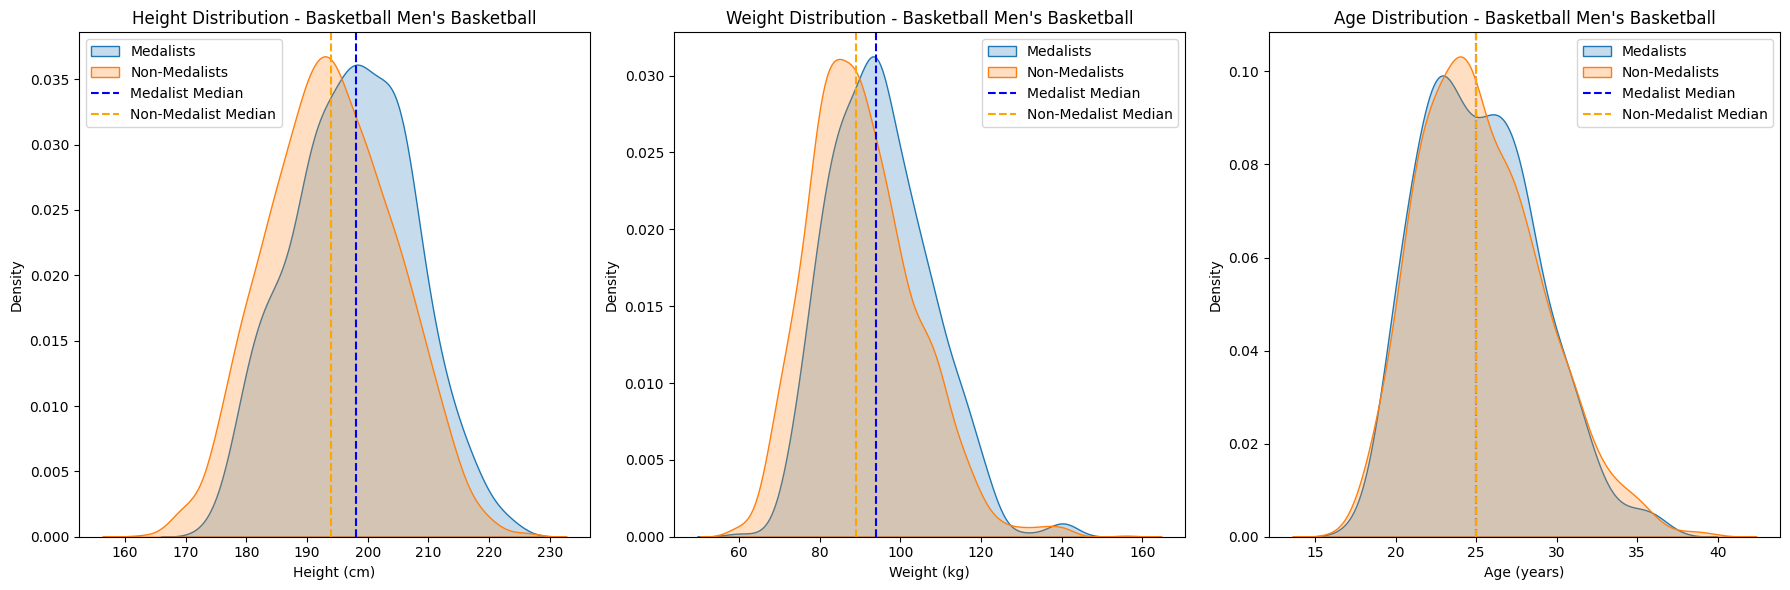

In [101]:
fig = plot_distributions('Basketball Men\'s Basketball')
plt.savefig('../images/basket.png')

In [89]:
distribution_results

,Event,Height_pvalue,Weight_pvalue,Age_pvalue,Strongest_factor,P_value,Height_effect,Weight_effect,Age_effect,log_P_value
0,"Canoeing Men's Kayak Fours, 1,000 metres",1.918695e-08,2.278512e-14,8.688740e-02,Weight,2.278512e-14,3.0,4.5,1.0,-31.412669
1,Basketball Men's Basketball,1.861836e-13,2.345346e-14,9.453143e-01,Weight,2.345346e-14,4.0,5.0,0.0,-31.383758
2,Ice Hockey Women's Ice Hockey,8.211889e-08,5.702212e-13,4.704105e-02,Weight,5.702212e-13,3.0,2.0,1.0,-28.192752
3,Water Polo Men's Water Polo,2.643434e-09,2.530720e-12,9.758556e-03,Weight,2.530720e-12,2.0,4.0,1.0,-26.702517
4,Athletics Men's 4 x 400 metres Relay,3.299247e-07,4.024965e-12,1.151537e-02,Weight,4.024965e-12,3.0,3.0,-1.0,-26.238505
5,Swimming Women's 4 x 100 metres Freestyle Relay,1.638355e-08,1.546177e-11,5.995546e-01,Weight,1.546177e-11,3.0,3.0,0.0,-24.892650
6,Volleyball Men's Volleyball,1.968400e-02,1.082584e-04,3.954500e-10,Age,3.954500e-10,0.0,2.0,1.0,-21.650997
7,Cycling Men's 100 kilometres Team Time Trial,2.702744e-08,5.743232e-10,4.954390e-01,Weight,5.743232e-10,3.0,5.0,0.0,-21.277829
8,Cross Country Skiing Men's 4 x 10 kilometres R...,3.583065e-02,8.034201e-01,1.163410e-09,Age,1.163410e-09,0.0,0.0,2.0,-20.571911
9,Gymnastics Men's Team All-Around,3.005906e-07,1.238120e-09,9.732693e-01,Weight,1.238120e-09,-2.0,-3.0,0.0,-20.509672


In [91]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_numeric
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
